<a href="https://colab.research.google.com/github/Stalk354/-/blob/main/%D0%9F%D0%BE%D0%BB%D0%BD%D1%8B%D0%B9_%D0%BA%D0%BE%D0%B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-1-f4e92c316703>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_power['Установленная мощность, МВт'][1] = df_power['Установленная мощность, МВт'][1] / 10


           Название ТЭС  Установленная мощность, МВт  \
№                                                      
11     Берёзовская ГРЭС                       2420.0   
10  Ставропольская ГРЭС                       2423.0   
9      Ириклинская ГРЭС                       2460.0   
8      Конаковская ГРЭС                       2520.0   
7        Киришская ГРЭС                       2595.0   
6        Рязанская ГРЭС                       3020.0   
5     Сургутская ГРЭС-1                       3333.0   
4         Пермская ГРЭС                       3393.0   
3      Костромская ГРЭС                       3720.0   
2       Рефтинская ГРЭС                       3800.0   
1     Сургутская ГРЭС-2                       5687.1   

                                       топливо Годы ввода агрегатов  \
№                                                                     
11                                 бурый уголь            1987—2015   
10                               природный газ            

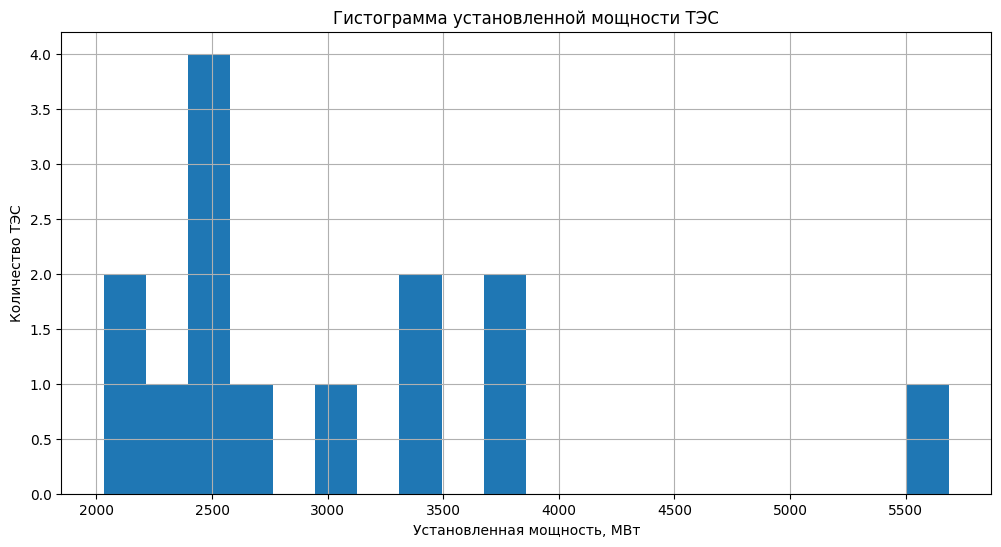

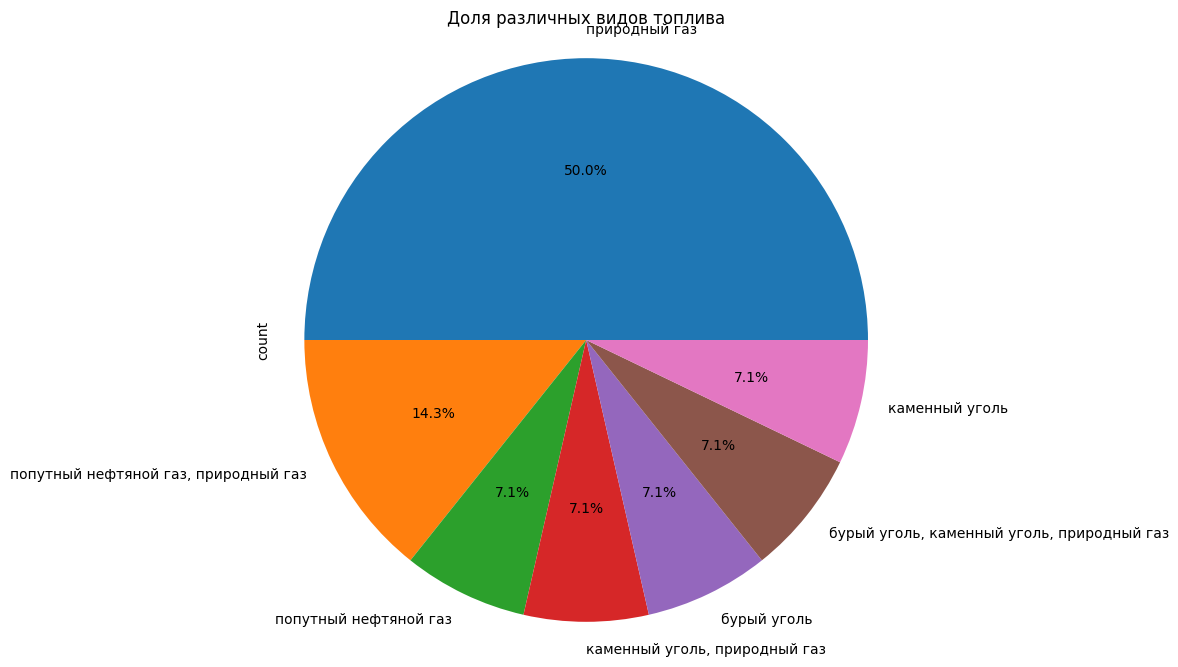

,Название ТЭС,"Установленная мощность, МВт",топливо,Годы ввода агрегатов,Собственник,Регион,Количество ТЭС в регионе
№,,,,,,,
14,Нижневартовская ГРЭС,2031.0,попутный нефтяной газ,1993—2014,Интер РАО,Ханты-Мансийский АО,3
13,Заинская ГРЭС,2204.9,природный газ,1963—1972,Татэнерго,Татарстан,1
12,Новочеркасская ГРЭС,2258.0,"каменный уголь, природный газ",1965—2016,ОГК-2,Ростовская область,1
11,Берёзовская ГРЭС,2420.0,бурый уголь,1987—2015,Юнипро,Красноярский край,1
10,Ставропольская ГРЭС,2423.0,природный газ,1975—1983,ОГК-2,Ставропольский край,1
9,Ириклинская ГРЭС,2460.0,природный газ,1970—1979,Интер РАО,Оренбургская область,1
8,Конаковская ГРЭС,2520.0,природный газ,1964—1968,Энел Россия,Тверская область,1
7,Киришская ГРЭС,2595.0,природный газ,1969—2012,ОГК-2,Ленинградская область,1
6,Рязанская ГРЭС,3020.0,"бурый уголь, каменный уголь, природный газ",1973—2016,Интер РАО,Рязанская область,1


In [ ]:
# 1. Подключение Pandas и NumPy
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt

# 2. Получение данных с сайта Системного оператора ЕЭС
url = "https://ru.wikipedia.org/wiki/%D0%A2%D0%B5%D0%BF%D0%BB%D0%BE%D0%B2%D0%B0%D1%8F_%D1%8D%D0%BD%D0%B5%D1%80%D0%B3%D0%B5%D1%82%D0%B8%D0%BA%D0%B0_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8"
id_table = 0
df_power = pd.read_html(url, header=0, index_col=0)[id_table]

# Исправление значений "Установленная мощность, МВт"
df_power['Установленная мощность, МВт'][1] = df_power['Установленная мощность, МВт'][1] / 10
df_power['Установленная мощность, МВт'][13] = df_power['Установленная мощность, МВт'][13] / 10

# 5. Сортировка
df_power = df_power.sort_values(['№','Название ТЭС','топливо','Годы ввода агрегатов','Собственник','Регион'])
df_power = df_power.sort_values(['Установленная мощность, МВт'], ascending=True)

# Добавление нового столбца "Количество ТЭС в регионе"
df_power['Количество ТЭС в регионе'] = df_power.groupby('Регион').transform('count')[df_power.columns[0]]



#Выборка данных по условию.
# Выбрать электростанции с мощностью выше 2300 МВт
print(df_power[df_power['Установленная мощность, МВт'] > 2300.])


#Выбор фрагмента таблицы по номерам строк и столбцов.
print(df_power[['Название ТЭС', 'Установленная мощность, МВт']])

print(df_power.loc[[5]])



#Расчеты статистических показателей по сгруппированным данным.


# Суммарная мощность по регионам.
print(df_power.groupby(['Регион'])['Установленная мощность, МВт'].sum())


# Максимальная мощность по регионам.
print(df_power.groupby(['Регион'])['Установленная мощность, МВт'].max())

#Построение гистограммы
plt.figure(figsize=(12, 6))
df_power['Установленная мощность, МВт'].hist(bins=20)
plt.title('Гистограмма установленной мощности ТЭС')
plt.xlabel('Установленная мощность, МВт')
plt.ylabel('Количество ТЭС')
plt.show()

#Построение круговой диаграммы
plt.figure(figsize=(8, 8))
df_power['топливо'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Доля различных видов топлива')
plt.axis('equal')
plt.show()

#Построение интерактивного графика с линиями
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_power.index, y=df_power['Установленная мощность, МВт'],
                        mode='lines+markers',
                        line=dict(color='royalblue'),
                        marker=dict(
                            size=10,
                            color=df_power['Количество ТЭС в регионе'],
                            colorscale='Viridis',
                            showscale=True
                        )))
fig.update_layout(
    title='Установленная мощность ТЭС',
    xaxis_title='ТЭС',
    yaxis_title='Установленная мощность, МВт',
    height=600,
    width=800
)
fig.show()

df_power